In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [60]:
#Problem1
#Generate 20 Bivariate Means
N=10
m1 = (0,1)
m2 = (1,0)
sigma = [[1,0],[0,1]]
lumps1 = np.random.multivariate_normal(m1, sigma, 10)
lumps2 = np.random.multivariate_normal(m2, sigma, 10)
lumps1

array([[-2.21049319, -0.38237148],
       [-0.83199119,  1.36079279],
       [-3.23295663,  0.63648989],
       [-0.88550905,  2.96756649],
       [ 1.40808276, -0.23254318],
       [-2.43789261,  0.42082425],
       [ 1.78081596,  1.42340061],
       [-0.96627602,  0.93559859],
       [-0.50364774,  1.25192004],
       [ 1.54239166, -2.34096582]])

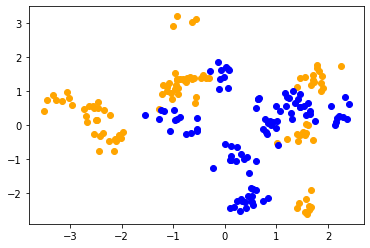

In [61]:
#Draw observations
pts1 = []
pts2 = []
sigma = [[0.04,0], [0, 0.04]]
for i in range(100):
    r1 = random.randint(0,9)
    m1 = lumps1[r1]
    pt1 = np.random.multivariate_normal(m1, sigma, 1)
    pts1.append((pt1[0][0], pt1[0][1]))
    r2 = random.randint(0,9)
    m2 = lumps2[r2]
    pt2 = np.random.multivariate_normal(m2, sigma, 1)
    pts2.append((pt2[0][0], pt2[0][1]))

x1 = [i[0] for i in pts1]
y1 = [i[1] for i in pts1]
x2 = [i[0] for i in pts2]
y2 = [i[1] for i in pts2]

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(x1, y1, color='orange')
ax1.scatter(x2, y2, color = 'blue')
plt.show()

 







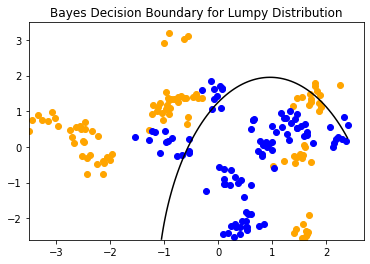

In [82]:
#Plot Bayes Decision Boundaries
xgrid = np.arange(min(min(x1), min(x2)), max(max(x1), max(x2)), .05)
ygrid = np.arange(min(min(y1), min(y2)), max(max(y1), max(y2)), .05)
X = np.concatenate([pts1, pts2])
y = np.zeros(200)
y[100:] = 1
clf = GaussianNB()
clf.fit(X, y)
xx, yy = np.meshgrid(xgrid, ygrid)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(x1, y1, color='orange')
ax1.scatter(x2, y2, color = 'blue')
ax1.contour(xx, yy, Z, [0.5], colors='k')
plt.title('Bayes Decision Boundary for Lumpy Distribution')
plt.show()


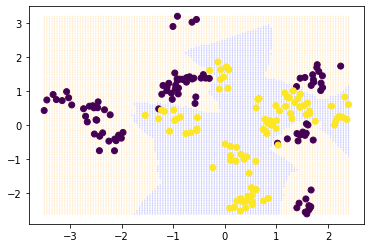

In [76]:
#Problem 2
fit3 = KNeighborsClassifier(n_neighbors=3).fit(X, y)
colorsnum = { 0 : "orange", 1: "blue"} 
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
        z[i,j]= fit3.predict(x[np.newaxis,:])
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = y )



In [77]:
def accuracy(fit, X):
    count = 0
    for i in range(len(X)):
        p = fit.predict([X[i]])
        if i < len(X)/2 and p == 0:
            count += 1
        if i >= len(X)/2 and p == 1:
            count += 1
    return count/len(X)


1.0
0.98
0.98
0.98
0.925
0.72
0.705


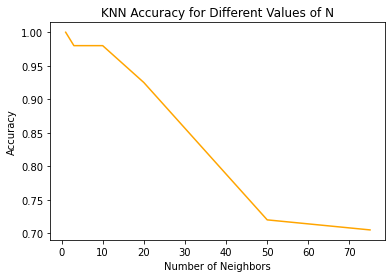

In [78]:

fit1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)
fit5 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
fit10 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
fit20 = KNeighborsClassifier(n_neighbors=20).fit(X, y)
fit50 = KNeighborsClassifier(n_neighbors=50).fit(X, y)
fit75 = KNeighborsClassifier(n_neighbors=75).fit(X, y)
print(accuracy(fit1, X))
print(accuracy(fit3, X))
print(accuracy(fit5, X))
print(accuracy(fit10, X))
print(accuracy(fit20, X))
print(accuracy(fit50, X))
print(accuracy(fit75, X))
x= [1,3,5,10,20,50,75]
y=[accuracy(fit1, X), accuracy(fit3, X), accuracy(fit5, X), accuracy(fit10, X), accuracy(fit20, X), accuracy(fit50, X), accuracy(fit75, X)]
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, color='orange')
plt.title("KNN Accuracy for Different Values of N")
plt.xlabel('Number of Neighbors')
plt.ylabel("Accuracy")
plt.show()



In [80]:
#Problem 3
test_pts1 = []
test_pts2 = []
sigma = [[0.2,0], [0, 0.2]]
for i in range(10000):
    r1 = random.randint(0,9)
    m1 = lumps1[r1]
    pt1 = np.random.multivariate_normal(m1, sigma, 1)
    test_pts1.append((pt1[0][0], pt1[0][1]))
    r2 = random.randint(0,9)
    m2 = lumps2[r2]
    pt2 = np.random.multivariate_normal(m2, sigma, 1)
    test_pts2.append((pt2[0][0], pt2[0][1]))

X_test = np.concatenate([test_pts1, test_pts2])


In [83]:
accuracies = []
for i in range(1, 201):
    fit = KNeighborsClassifier(n_neighbors=i).fit(X, y)
    accuracies.append(accuracy(fit, X_test))



In [84]:
accuracies_train = []
for i in range(1, 201):
    fit = KNeighborsClassifier(n_neighbors=i).fit(X, y)
    accuracies_train.append(accuracy(fit, X))

In [97]:
len(accuracies)
len(np.arange(1,200))

199

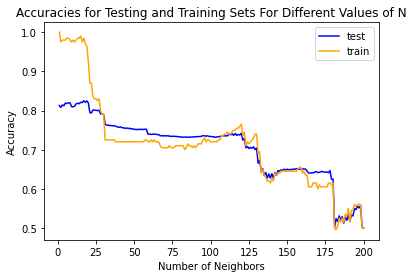

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot()
k = np.arange(1, 201)
ax1.plot(k, accuracies, color='blue', label='test')
ax1.plot(k, accuracies_train, color='orange', label='train')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracies for Testing and Training Sets For Different Values of N")
plt.show()



In [86]:
#Problem 4
#Split and clean data
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('default of credit card clients.csv')
data_train_x = data.iloc[1:15000, 1:24].values
data_test_x = data.iloc[15000:, 1:24].values
y_train = data.iloc[1:15000, 24].values
y_test = data.iloc[15000:, 24].values
scaler = StandardScaler()
scaler.fit(data_train_x)
X_train = scaler.transform(data_train_x)
scaler.fit(data_test_x)
X_test = scaler.transform(data_test_x)






In [87]:
def accuracy2(X, y, fit):
    count = 0
    for i in range(len(X)):
        p = fit.predict([X[i]])
        if p == y[i]:
            count+=1
    return count/len(X)

In [88]:
#Make and test models
fit1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
fit3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
fit10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
fit25 = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)
fit75 = KNeighborsClassifier(n_neighbors=75).fit(X_train, y_train)
print(accuracy2(X_train, y_train, fit1))
print(accuracy2(X_train, y_train, fit3))
print(accuracy2(X_train, y_train, fit10))
print(accuracy2(X_train, y_train, fit25))
print(accuracy2(X_train, y_train, fit75))
print(accuracy2(X_test, y_test, fit1))
print(accuracy2(X_test, y_test, fit3))
print(accuracy2(X_test, y_test, fit10))
print(accuracy2(X_test, y_test, fit25))
print(accuracy2(X_test, y_test, fit75))

0.9992666177745183
0.8577238482565505
0.8176545103006867
0.8067204480298686
0.799453296886459
0.729084727684821
0.7781481234584361
0.811812545830278
0.8172121858542764
0.8140790613959069


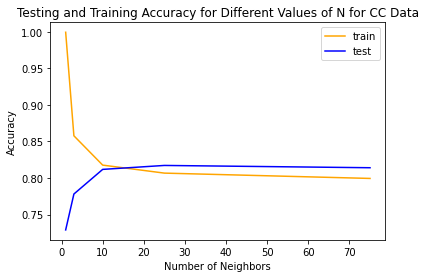

In [89]:
x = [1, 3, 10, 25, 75]
y1 = [accuracy2(X_train, y_train, fit1), accuracy2(X_train, y_train, fit3), accuracy2(X_train, y_train, fit10), accuracy2(X_train, y_train, fit25), accuracy2(X_train, y_train, fit75)]
y2 = [accuracy2(X_test, y_test, fit1), accuracy2(X_test, y_test, fit3), accuracy2(X_test, y_test, fit10), accuracy2(X_test, y_test, fit25), accuracy2(X_test, y_test, fit75)]
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y1, color='orange', label='train')
ax.plot(x, y2, color='blue', label='test')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Testing and Training Accuracy for Different Values of N for CC Data")
plt.legend()
plt.show()